<a href="https://colab.research.google.com/github/Laurent2320/139838160_project/blob/ste/src/app/139m_project_model_star_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/euromillions_202002.csv',sep=';', encoding='ISO-8859-1')

In [3]:
df.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,numéro_de_tirage_dans_le_cycle,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,...,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_My_Million,numero_Tirage_Exceptionnel_Euro_Million,Unnamed: 75
0,20244007,MARDI,23/01/2024,1,24/03/2024,48,23,14,50,39,...,"4,4",12899,"11,7",30850,"2,7",308046,"2,4",KR 537 5327,NaN,NaN
1,20244006,VENDREDI,19/01/2024,1,20/03/2024,50,27,28,48,44,...,4,18046,"11,1",42691,"2,6",424081,"2,3",QE 911 6397,NaN,NaN
2,20244005,MARDI,16/01/2024,7,17/03/2024,18,21,33,45,10,...,"4,4",13958,"12,7",39974,"2,5",328733,"2,7",CU 208 5890,NaN,NaN
3,20244004,VENDREDI,12/01/2024,6,13/03/2024,18,16,17,49,45,...,"4,3",18344,"12,4",46653,"2,7",427062,"2,6",RT 208 4085,NaN,NaN
4,20244003,MARDI,09/01/2024,5,10/03/2024,12,9,2,39,40,...,"3,8",15703,"10,8",41373,"2,3",339112,"2,4",LN 958 0675,NaN,NaN


In [4]:
column_names = df.columns
column_names

Index(['annee_numero_de_tirage', 'jour_de_tirage', 'date_de_tirage',
       'numéro_de_tirage_dans_le_cycle', 'date_de_forclusion', 'boule_1',
       'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2',
       'boules_gagnantes_en_ordre_croissant',
       'etoiles_gagnantes_en_ordre_croissant',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_europe',
       'rapport_du_rang1_Euro_Millions',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_europe',
       'rapport_du_rang2_Euro_Millions',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_europe',
       'rapport_du_rang3_Euro_Millions',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_europe',
       'rapport_du_rang4_Euro_Millions',
       'nombre_de_gagnant_au_rang5_Eu

In [5]:
df_ligth = df[['etoile_1','etoile_2']]

In [7]:
test = df[['etoiles_gagnantes_en_ordre_croissant']]

In [10]:
test.head(2)

,etoiles_gagnantes_en_ordre_croissant
0,-3-12-
1,-7-12-


In [11]:
df_ligth.head()

,etoile_1,etoile_2
0,12,3
1,7,12
2,12,8
3,9,12
4,3,1


In [12]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

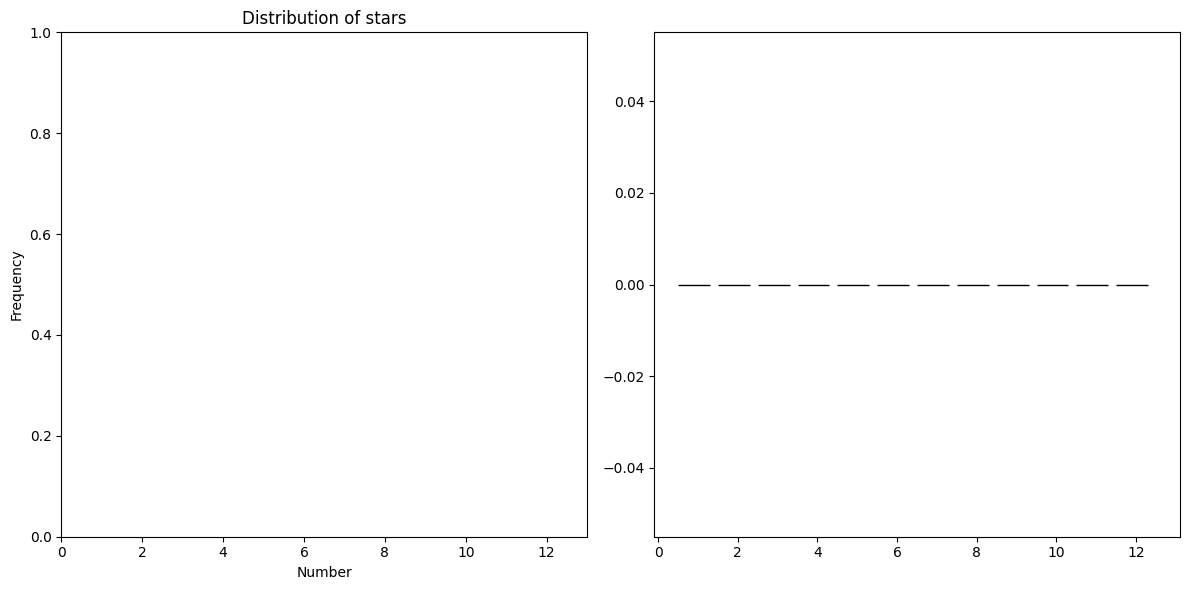

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bin_edges = [edge - 0.5 for edge in range(df_ligth.min().min(), df_ligth.max().max() + 2)]
# # Histogram for features 1 to 5
# axes[0].hist(df_ligth.iloc[:, :5].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.95)
# axes[0].set_title('Distribution of Numbers (Features 1 to 5)')
# axes[0].set_xlabel('Number')
# axes[0].set_ylabel('Frequency')
# axes[0].set_xlim([0, 51])

# Histogram for features 6 and 7
hist_2 = axes[1].hist(df_ligth.iloc[:, 5:].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
axes[0].set_title('Distribution of stars')
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Frequency')

# Customize x-axis labels for the second subplot
# axes[1].set_xticks(hist_2[1])
# axes[1].set_xticklabels(hist_2[1])
axes[0].set_xlim([0, 13])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Select features 1 to 5
features_1_to_5 = df_ligth.iloc[:, :5]
# Check if at least one value in each row is less than 10
at_least_one_less_than_10 = (features_1_to_5 < 10).any(axis=1)

# Count the number of rows where at least one value is less than 10
count_rows_at_least_one_less_than_10 = at_least_one_less_than_10.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 10 appears numbers: {count_rows_at_least_one_less_than_10:.2f}%')

% of times a value < 10 appears numbers: 62.04%


In [ ]:
# Check if at least one value in each row is less than 20
at_least_one_less_than_20 = ((features_1_to_5 >= 10) & (features_1_to_5 < 20)).any(axis=1)

# Count the number of rows where at least one value is less than 20
count_rows_at_least_one_less_than_20 = at_least_one_less_than_20.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 20 appears numbers: {count_rows_at_least_one_less_than_20:.2f}%')

% of times a value < 20 appears numbers: 69.67%


In [ ]:
# Check if at least one value in each row is less than 30
at_least_one_less_than_30 = ((features_1_to_5 >= 20) & (features_1_to_5 < 30)).any(axis=1)

# Count the number of rows where at least one value is less than 30
count_rows_at_least_one_less_than_30 = at_least_one_less_than_30.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 30 appears numbers: {count_rows_at_least_one_less_than_30:.2f}%')

% of times a value < 30 appears numbers: 71.04%


In [ ]:
# Check if at least one value in each row is less than 40
at_least_one_less_than_40 = ((features_1_to_5 >= 30) & (features_1_to_5 < 40)).any(axis=1)

# Count the number of rows where at least one value is less than 40
count_rows_at_least_one_less_than_40 = at_least_one_less_than_40.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 40 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value < 40 appears numbers: 70.25%


In [ ]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_50 = ((features_1_to_5 >= 40) & (features_1_to_5 <= 50)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_40 = at_least_one_less_than_50.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 50 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value <= 50 appears numbers: 73.58%


In [ ]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_25 = ((features_1_to_5 <= 25)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_25 = at_least_one_less_than_25.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 25 appears numbers: {count_rows_at_least_one_less_than_25:.2f}%')

% of times a value <= 25 appears numbers: 98.04%


In [ ]:
Number50 = (features_1_to_5 == 50).any(axis=1)
Number50 = Number50.sum()/df_ligth.shape[0]*100
print(f'% 50: {Number50:.2f}%')

% 50: 9.39%


In [ ]:
Number1 = (features_1_to_5 == 1).any(axis=1)
Number1 = Number1.sum()/df_ligth.shape[0]*100
print(f'% 1: {Number1:.2f}%')

% 1: 8.61%


In [ ]:
# Count the number of values less than 24 for each row in features 1 to 5
count_less_than_25_per_row = (features_1_to_5 <= 25).sum(axis=1)

# Print the count for each row
print('Number of values less than 25 for each row:')
print(count_less_than_25_per_row)


Number of values less than 25 for each row:
0      0
1      3
2      3
3      3
4      3
      ..
506    3
507    4
508    4
509    3
510    3
Length: 511, dtype: int64


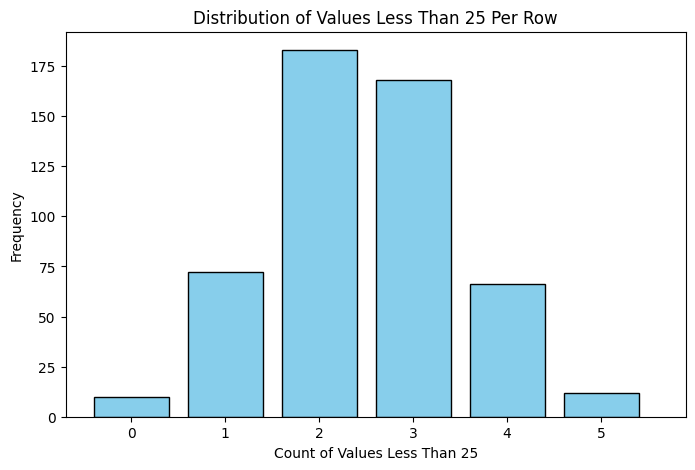

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 5))
bin_edges = [edge - 0.4 for edge in range(count_less_than_25_per_row.min(), count_less_than_25_per_row.max() + 2)]
plt.hist(count_less_than_25_per_row, bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
plt.title('Distribution of Values Less Than 25 Per Row')
plt.xlabel('Count of Values Less Than 25')
plt.ylabel('Frequency')
plt.xticks(range(6))
plt.show()

## Create Data with a windows

In [16]:
# frequency of a number in the last window rows
def count_frequency(dataframe, windows):
    df_ = dataframe.copy()
    # for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
    #     df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    for col in ['etoile_1', 'etoile_2']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['etoile_1', 'etoile_2']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    return df_

In [17]:
df_ligth.tail(2)

,etoile_1,etoile_2
413,9,3
414,6,7


In [18]:
df_ligth.head(2)

,etoile_1,etoile_2
0,12,3
1,7,12


In [19]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [20]:
df_ligth.tail(2)

,etoile_1,etoile_2
413,7,12
414,12,3


In [21]:
df_ligth.head(2)

,etoile_1,etoile_2
0,6,7
1,9,3


In [22]:
df_extend = count_frequency(df_ligth, windows = 12)

In [ ]:
df_extend.shape

(511, 14)

In [52]:
df_extend.head(15)

,etoile_1,etoile_2,freq_etoile_1,freq_etoile_2
0,6,7,0,0
1,9,3,0,0
2,6,10,1,0
3,10,6,1,2
4,10,2,2,0
5,5,9,0,1
6,6,4,3,0
7,4,3,1,1
8,10,1,3,0
9,11,1,0,1


In [56]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 0:2])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = 12

# Create sequences for X and y
X, y = create_sequences(df_extend, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (403, 12, 4)
y shape: (403, 2)


In [57]:
print(X[-1])

[[ 9 12  3  2]
 [ 9  5  4  3]
 [12  2  3  3]
 [12  4  4  1]
 [ 9 10  4  0]
 [ 9  6  5  0]
 [12 10  4  1]
 [ 8  3  2  0]
 [ 3  1  1  0]
 [ 9 12  6  5]
 [12  8  5  2]
 [ 7 12  0  6]]


In [58]:
print(y[-1])

[12  3]


In [59]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [60]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (322, 12, 4) X_test: (81, 12, 4)
y_train: (322, 2) y_test: (81, 2)


##Model: TSLM

In [ ]:
# # TODO: Train your LSTM model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout
# from tensorflow.keras.optimizers import Adam
# # Define the model
# def my_LSTM(units, window_length, nb_label_feature, dropout):

#     model = Sequential()

#     # We add two layers of LSTM
#     model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
#     #model.add(LSTM(units=units, dropout=dropout, return_sequences=True))
#     model.add(LSTM(units=units, return_sequences=False))
#     model.add(Dropout(dropout))
#     #model.add(LSTM(units=units, dropout=dropout, return_sequences=True))
#     model.add(LSTM(units=units, return_sequences=True))
#     model.add(Dropout(dropout))
#     model.add(LSTM(units=units, return_sequences=False))
#     # Output layer
#     model.add(Dense(units=nb_label_feature))

#     return model

In [61]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, nb_label, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=False))
    # model.add(Dropout(0.2))
    # Output layer
    model.add(Dense(units=nb_label))

    return model

In [62]:
def adapt_learning_rate(epoch):
    if epoch < 500:
      return 0.0005
    elif epoch < 1000:
      return 0.0001
    else:
      return 0.00005

my_lr_scheduler = LearningRateScheduler(adapt_learning_rate)

In [75]:
units = 32
window_length = rows_windows
nb_feature = X_train.shape[2]
nb_label = y.shape[1]
DROPOUT = 0.2
BATCHSIZE = 64
EPOCHS = 5000
OPTIMIZER  = Adam(learning_rate=0.0002)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [76]:
model = my_LSTM(units, window_length, nb_feature, nb_label, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 12, 32)            4736      
                                                                 
 dropout_6 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_10 (LSTM)              (None, 12, 32)            8320      
                                                                 
 dropout_7 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 21442 (83.76 KB)
Trainable params: 21442

In [77]:
# # Define early stopping

early_stop = EarlyStopping(monitor='val_loss', patience=3000, restore_best_weights=True)

In [66]:
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
# # history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
# model.save('test'+'.h5')

In [78]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
# model.save('test_valid_test_{units}'+'.h5')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6/6 [==============================] - 0s 15ms/step - loss: 6.0017 - accuracy: 0.7857
Epoch 2502/5000
6/6 [==============================] - 0s 12ms/step - loss: 6.3771 - accuracy: 0.7702
Epoch 2503/5000
6/6 [==============================] - 0s 12ms/step - loss: 6.3265 - accuracy: 0.7702
Epoch 2504/5000
6/6 [==============================] - 0s 12ms/step - loss: 6.2889 - accuracy: 0.7888
Epoch 2505/5000
6/6 [==============================] - 0s 11ms/step - loss: 6.2800 - accuracy: 0.7733
Epoch 2506/5000
6/6 [==============================] - 0s 12ms/step - loss: 6.0461 - accuracy: 0.7857
Epoch 2507/5000
6/6 [==============================] - 0s 13ms/step - loss: 6.5027 - accuracy: 0.7702
Epoch 2508/5000
6/6 [==============================] - 0s 12ms/step - loss: 6.0995 - accuracy: 0.7453
Epoch 2509/5000
6/6 [==============================] - 0s 13ms/step - loss: 6.1219 - accuracy: 0.7764
Epoch 2510/5000
6/6 

In [79]:
model.save(f'test_valid_test_{units}_{BATCHSIZE}'+'.h5')

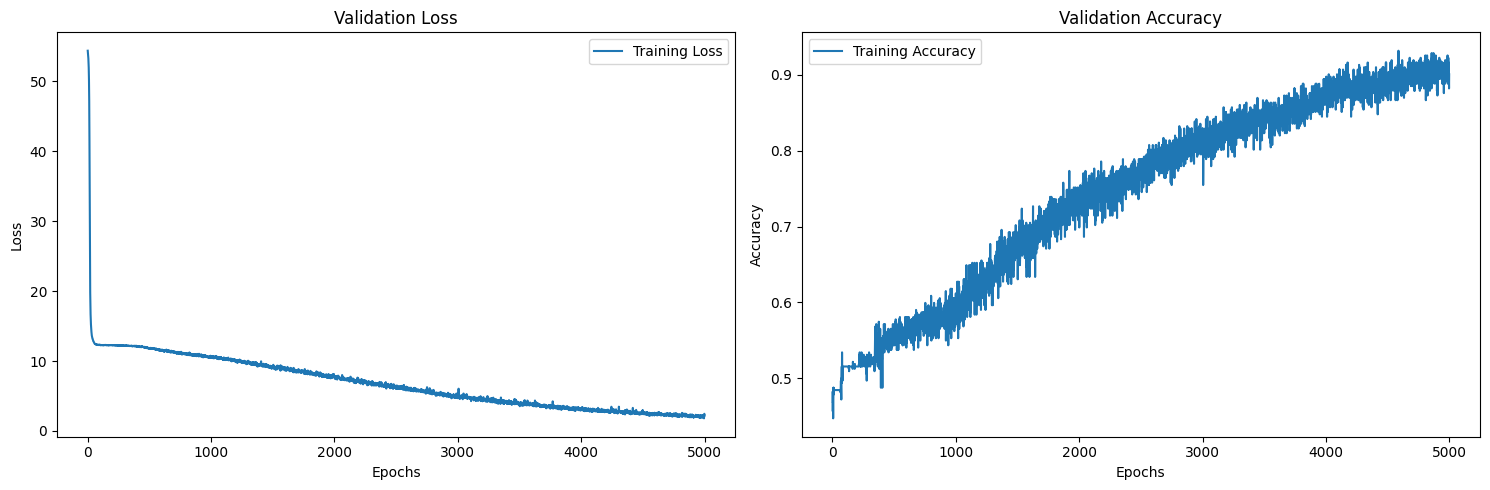

In [80]:
plt.figure(figsize=(15, 5))

# Subplot pour la Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot pour l'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Ajuster automatiquement la disposition des sous-graphiques pour éviter les chevauchements
plt.show()

In [81]:
predictions = model.predict(X_test)

3/3 [==============================] - 1s 6ms/step


In [84]:
import numpy as np
import pandas as pd

# Assuming predictions and y_test are defined somewhere in your code

# Convert predictions and y_test to pandas Series for easier comparison
predictions_series = pd.Series(np.round(predictions).astype(int))
y_test_series = pd.Series(y_test)

# Use isin function to check if each rounded prediction is in the corresponding y_test value
correct_predictions_mask = predictions_series.isin(y_test_series)

# Count the number of correct predictions
correct_predictions_count = correct_predictions_mask.sum()

# Print the correct predictions count
print("Number of correct predictions:", correct_predictions_count)

# Print the indices and values where predictions are correct
correct_predictions_indices = correct_predictions_mask[correct_predictions_mask].index
for idx in correct_predictions_indices:
    print(f'Index: {idx}, y_pred: {predictions_series[idx]}, y_test: {y_test_series[idx]}')

ValueError: Data must be 1-dimensional

In [85]:
for idx in range(0, 80):
  print()
  print('y_pred', np.round(predictions[idx]).astype(int), '\ny_test', y_test[idx], )
  print(np.isin(predictions[idx], y_test[idx]))




y_pred [8 4] 
y_test [11 10]
[False False]

y_pred [9 3] 
y_test [8 2]
[False False]

y_pred [10  4] 
y_test [12  1]
[False False]

y_pred [4 5] 
y_test [ 1 10]
[False False]

y_pred [10 10] 
y_test [8 7]
[False False]

y_pred [2 9] 
y_test [3 7]
[False False]

y_pred [ 2 10] 
y_test [9 7]
[False False]

y_pred [7 7] 
y_test [6 4]
[False False]

y_pred [ 2 10] 
y_test [ 4 11]
[False False]

y_pred [3 8] 
y_test [3 9]
[False False]

y_pred [1 4] 
y_test [11  2]
[False False]

y_pred [1 8] 
y_test [1 7]
[False False]

y_pred [1 9] 
y_test [8 2]
[False False]

y_pred [7 6] 
y_test [10 11]
[False False]

y_pred [6 2] 
y_test [10  2]
[False False]

y_pred [5 6] 
y_test [11 12]
[False False]

y_pred [5 7] 
y_test [5 6]
[False False]

y_pred [5 6] 
y_test [ 9 11]
[False False]

y_pred [5 9] 
y_test [6 5]
[False False]

y_pred [11  3] 
y_test [10 11]
[False False]

y_pred [5 5] 
y_test [7 1]
[False False]

y_pred [ 5 10] 
y_test [10  7]
[False False]

y_pred [5 3] 
y_test [8 2]
[False False]
